In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
os.chdir(r'E:\MachineLearning\SVM\New folder\3 Take-Home Assignment')

In [3]:
os.listdir()

['loan.xlsx', 'Support Vector Machine_Take Home Questions.ipynb']

In [4]:
df=pd.read_excel('loan.xlsx',sheet_name='Data')

In [5]:
df.shape

(5000, 14)

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### EDA

### A.Univariate Analysis

In [8]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [9]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

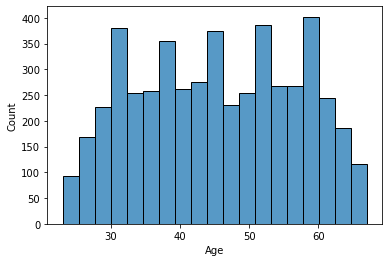

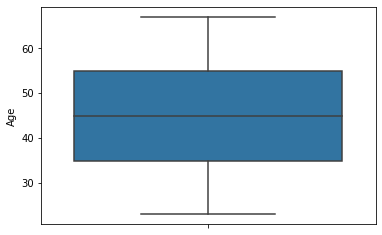

{'missing': 0,
 'min': 23,
 'max': 67,
 'mean': 45.34,
 'var': 131.4,
 'std': 11.46,
 'range': 44,
 'q1': 35.0,
 'q2': 45.0,
 'q3': 55.0,
 'skewness': -0.03,
 'kurtosis': -1.15}

In [10]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_num(data=df,x='Age')

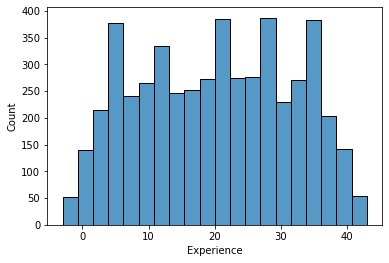

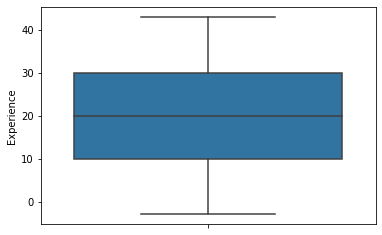

{'missing': 0,
 'min': -3,
 'max': 43,
 'mean': 20.1,
 'var': 131.51,
 'std': 11.47,
 'range': 46,
 'q1': 10.0,
 'q2': 20.0,
 'q3': 30.0,
 'skewness': -0.03,
 'kurtosis': -1.12}

In [11]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_num(data=df,x='Experience')

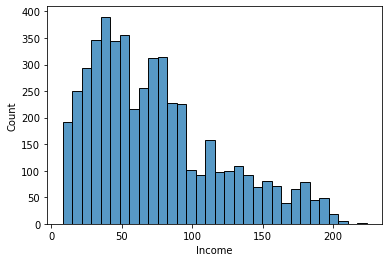

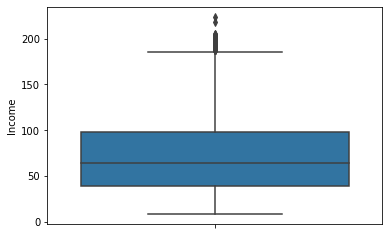

{'missing': 0,
 'min': 8,
 'max': 224,
 'mean': 73.77,
 'var': 2119.1,
 'std': 46.03,
 'range': 216,
 'q1': 39.0,
 'q2': 64.0,
 'q3': 98.0,
 'skewness': 0.84,
 'kurtosis': -0.04}

In [12]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_num(data=df,x='Income')

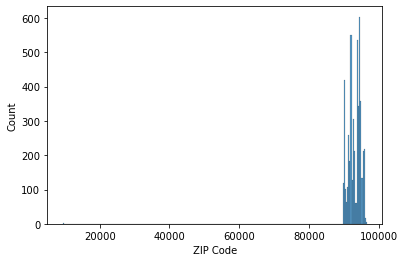

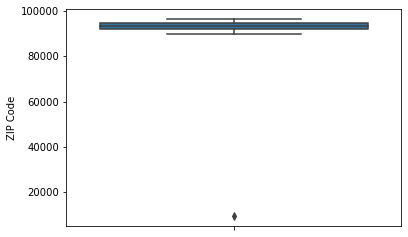

{'missing': 0,
 'min': 9307,
 'max': 96651,
 'mean': 93152.5,
 'var': 4502256.75,
 'std': 2121.85,
 'range': 87344,
 'q1': 91911.0,
 'q2': 93437.0,
 'q3': 94608.0,
 'skewness': -12.5,
 'kurtosis': 486.2}

In [13]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_num(data=df,x='ZIP Code')

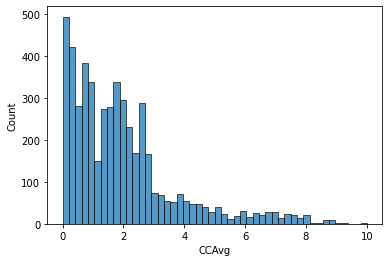

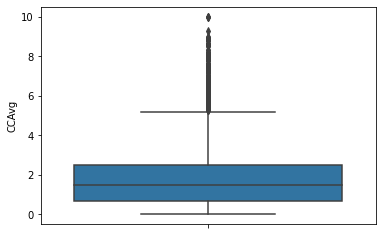

{'missing': 0,
 'min': 0.0,
 'max': 10.0,
 'mean': 1.94,
 'var': 3.05,
 'std': 1.75,
 'range': 10.0,
 'q1': 0.7,
 'q2': 1.5,
 'q3': 2.5,
 'skewness': 1.6,
 'kurtosis': 2.65}

In [14]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_num(data=df,x='CCAvg')

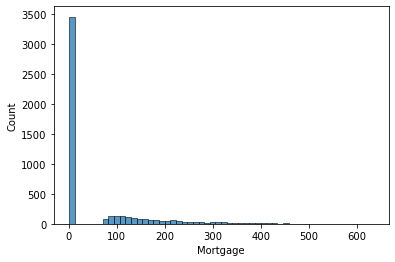

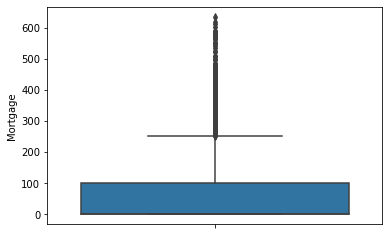

{'missing': 0,
 'min': 0,
 'max': 635,
 'mean': 56.5,
 'var': 10345.7,
 'std': 101.71,
 'range': 635,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 101.0,
 'skewness': 2.1,
 'kurtosis': 4.76}

In [15]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_num(data=df,x='Mortgage')

In [16]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={'ed':'Count'},inplace=True)
    
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'Percentage'},inplace=True)
    f2['Percentage']=(f2['Percentage']*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)    
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print("value counts and %n ",ff)
    plt.figure(figsize=(5,4))
    sns.countplot(data=data,x=x)
    plt.show()


Total missing values : 0

Total count of unique categories: 4

Unique categories :
[4, 3, 1, 2]
value counts and %n     Family Percentage
1    1472     29.44%
2    1296     25.92%
4    1222     24.44%
3    1010      20.2%


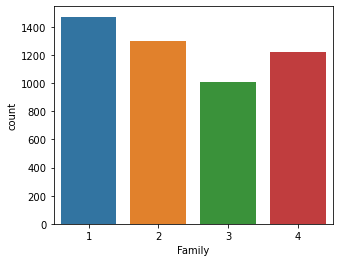

In [17]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_cat(data=df,x='Family')

Total missing values : 0

Total count of unique categories: 3

Unique categories :
[1, 2, 3]
value counts and %n     Education Percentage
1       2096     41.92%
3       1501     30.02%
2       1403     28.06%


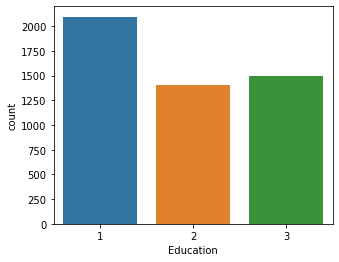

In [18]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_cat(data=df,x='Education')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
value counts and %n     CD Account Percentage
0        4698     93.96%
1         302      6.04%


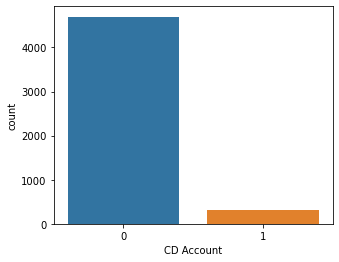

In [19]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_cat(data=df,x='CD Account')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
value counts and %n     Online Percentage
1    2984     59.68%
0    2016     40.32%


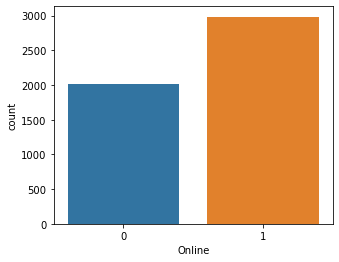

In [20]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_cat(data=df,x='Online')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
value counts and %n     CreditCard Percentage
0        3530      70.6%
1        1470      29.4%


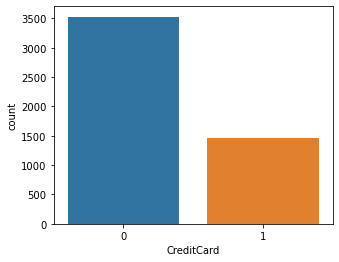

In [21]:
# 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
#        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
#        'CD Account', 'Online', 'CreditCard'

univariate_cat(data=df,x='CreditCard')

### Missing Value Treatment

In [22]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Outlier Treatment

In [23]:
df.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.95,.96,.98,.99]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,95%,96%,98%,99%,max
ID,5000.0,2500.500000,1443.520003,1.0,500.9,1000.8,1500.7,2000.6,2500.5,3000.4,3500.3,4000.2,4750.05,4800.04,4900.02,4950.01,5000.0
Age,5000.0,45.338400,11.463166,23.0,30.0,34.0,38.0,42.0,45.0,50.0,53.0,57.0,63.00,63.00,65.00,65.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,4.0,8.0,12.0,17.0,20.0,24.0,28.0,32.0,38.00,38.00,40.00,41.00,43.0
Income,5000.0,73.774200,46.033729,8.0,22.0,33.0,42.0,52.0,64.0,78.0,88.3,113.0,170.00,175.00,185.00,193.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,90275.0,91365.0,92095.1,92647.0,93437.0,94111.0,94534.6,94720.0,95670.00,95764.00,95825.00,95929.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,4.00,4.00,4.00,4.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.3,0.5,0.8,1.2,1.5,1.9,2.3,2.8,6.00,6.40,7.30,8.00,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.00,3.00,3.00,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,123.0,272.00,301.00,366.04,431.01,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.00,1.0


In [24]:
def out(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(0.1))
    return x

In [25]:
df1=df.apply(lambda x:out(x))

In [26]:
df1.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.95,.96,.98,.99]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,95%,96%,98%,99%,max
ID,5000.0,2500.245100,1443.084316,1.0,500.9,1000.8,1500.7,2000.6,2500.5,3000.4,3500.3,4000.2,4750.05,4800.04,4900.02,4950.0001,4950.01
Age,5000.0,45.328800,11.446051,23.0,30.0,34.0,38.0,42.0,45.0,50.0,53.0,57.0,63.00,63.00,65.00,65.0000,65.00
Experience,5000.0,20.101800,11.462675,-3.0,4.0,8.0,12.0,17.0,20.0,24.0,28.0,32.0,38.00,38.00,40.00,41.0000,41.00
Income,5000.0,73.717600,45.879608,8.0,22.0,33.0,42.0,52.0,64.0,78.0,88.3,113.0,170.00,175.00,185.00,193.0000,193.00
ZIP Code,5000.0,93150.785000,2119.425970,9307.0,90275.0,91365.0,92095.1,92647.0,93437.0,94111.0,94534.6,94720.0,95670.00,95764.00,95825.00,95929.0000,95929.00
Family,5000.0,2.396400,1.147663,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,4.00,4.00,4.00,4.0000,4.00
CCAvg,5000.0,1.932913,1.728724,0.0,0.3,0.5,0.8,1.2,1.5,1.9,2.3,2.8,6.00,6.40,7.30,8.0000,8.00
Education,5000.0,1.881000,0.839869,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.00,3.00,3.00,3.0000,3.00
Mortgage,5000.0,55.686100,98.161339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,123.0,272.00,301.00,366.04,431.0001,431.01
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.0000,1.00


In [27]:
df1[df1['Experience']<0].shape

(52, 14)

In [28]:
52/5000

0.0104

In [29]:
df2=df1[df1['Experience']>=0]

In [30]:
df2.shape # omiting those with negative experience

(4948, 14)

### Multicollinearity

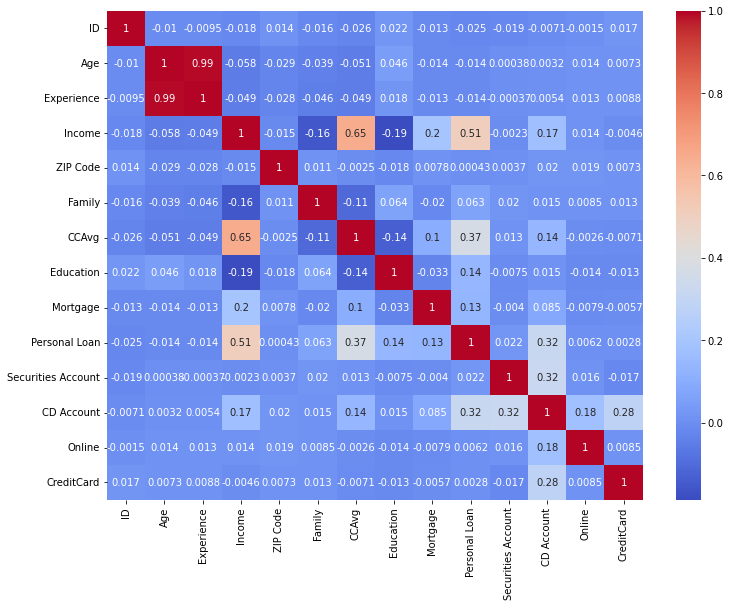

In [31]:
cr=df2.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cr,cmap='coolwarm',annot=True)
plt.show()

In [32]:
df2['ZIP Code'].nunique()

457

In [33]:
df2['ZIP Code'].dtypes

dtype('float64')

In [34]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [35]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [36]:
df['ZIP Code'].dtypes

dtype('int64')

In [37]:
df['first_two_zip']=df['ZIP Code'].astype(str).str[:2]

In [38]:
df['first_two_zip'].value_counts()

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: first_two_zip, dtype: int64

In [39]:
df.drop(columns=['ID','ZIP Code'],inplace=True)

In [40]:
df.shape

(5000, 13)

### Model Development

#### 1.Logistic Regression

In [120]:
y=df2['Personal Loan']
x=df2.drop(columns=['Personal Loan'])

In [41]:
x=df2.drop(columns=['Personal Loan'])
x

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.00,25.0,1.0,49.0,91107.0,4,1.6,1,0.0,1,0,0,0
1,2.00,45.0,19.0,34.0,90089.0,3,1.5,1,0.0,1,0,0,0
2,3.00,39.0,15.0,11.0,94720.0,1,1.0,1,0.0,0,0,0,0
3,4.00,35.0,9.0,100.0,94112.0,1,2.7,2,0.0,0,0,0,0
4,5.00,35.0,8.0,45.0,91330.0,4,1.0,2,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4950.01,29.0,3.0,40.0,92697.0,1,1.9,3,0.0,0,0,1,0
4996,4950.01,30.0,4.0,15.0,92037.0,4,0.4,1,85.0,0,0,1,0
4997,4950.01,63.0,39.0,24.0,93023.0,2,0.3,3,0.0,0,0,0,0
4998,4950.01,65.0,40.0,49.0,90034.0,3,0.5,2,0.0,0,0,1,0


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,
                                              random_state=0)

In [122]:
logR=LogisticRegression()
logR.fit(x_train,y_train)

LogisticRegression()

In [123]:
print('Train Score:',logR.score(x_train,y_train))
print('Test Score:',logR.score(x_test,y_test))

Train Score: 0.9059552681218
Test Score: 0.9086499595796281


In [124]:
pred_train=logR.predict(x_train)

In [125]:
act_pred_train=pd.DataFrame({'Act':y_train,'Pred':pred_train})
act_pred_train

,Act,Pred
3276,1,0
3126,0,0
1084,1,1
3042,0,0
1570,1,0
...,...,...
4983,0,0
3300,0,0
1672,1,1
2632,0,0


### Model Evaluation

In [126]:
pd.crosstab(act_pred_train['Act'],act_pred_train['Pred'])

Pred,0,1
Act,,
0,3249,102
1,247,113


In [127]:
conf_train=metrics.confusion_matrix(y_train,pred_train)
conf_train

array([[3249,  102],
       [ 247,  113]], dtype=int64)

In [128]:
pd.DataFrame(conf_train,columns=["Pred_0_neg","Pred_1_pos"],
            index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,3249,102
Act_1_pos,247,113


In [129]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3351
           1       0.53      0.31      0.39       360

    accuracy                           0.91      3711
   macro avg       0.73      0.64      0.67      3711
weighted avg       0.89      0.91      0.90      3711



In [130]:
prob_train=pd.DataFrame(logR.predict_proba(x_train),columns=['prob_0','prob_1'])

In [131]:
prob_train

,prob_0,prob_1
0,0.549159,0.450841
1,0.967474,0.032526
2,0.275434,0.724566
3,0.965654,0.034346
4,0.878928,0.121072
...,...,...
3706,0.975435,0.024565
3707,0.989235,0.010765
3708,0.448312,0.551688
3709,0.957984,0.042016


In [132]:
new_pred_train=np.where(prob_train['prob_1']>.5,1,0)
print(metrics.classification_report(y_train,new_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3351
           1       0.53      0.31      0.39       360

    accuracy                           0.91      3711
   macro avg       0.73      0.64      0.67      3711
weighted avg       0.89      0.91      0.90      3711



## 2.Decision Tree

In [134]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier

In [135]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [136]:
print('Train Accuracy:',round(dt.score(x_train,y_train),2))
print('Test Accuracy:',round(dt.score(x_test,y_test),2))

Train Accuracy: 1.0
Test Accuracy: 0.98


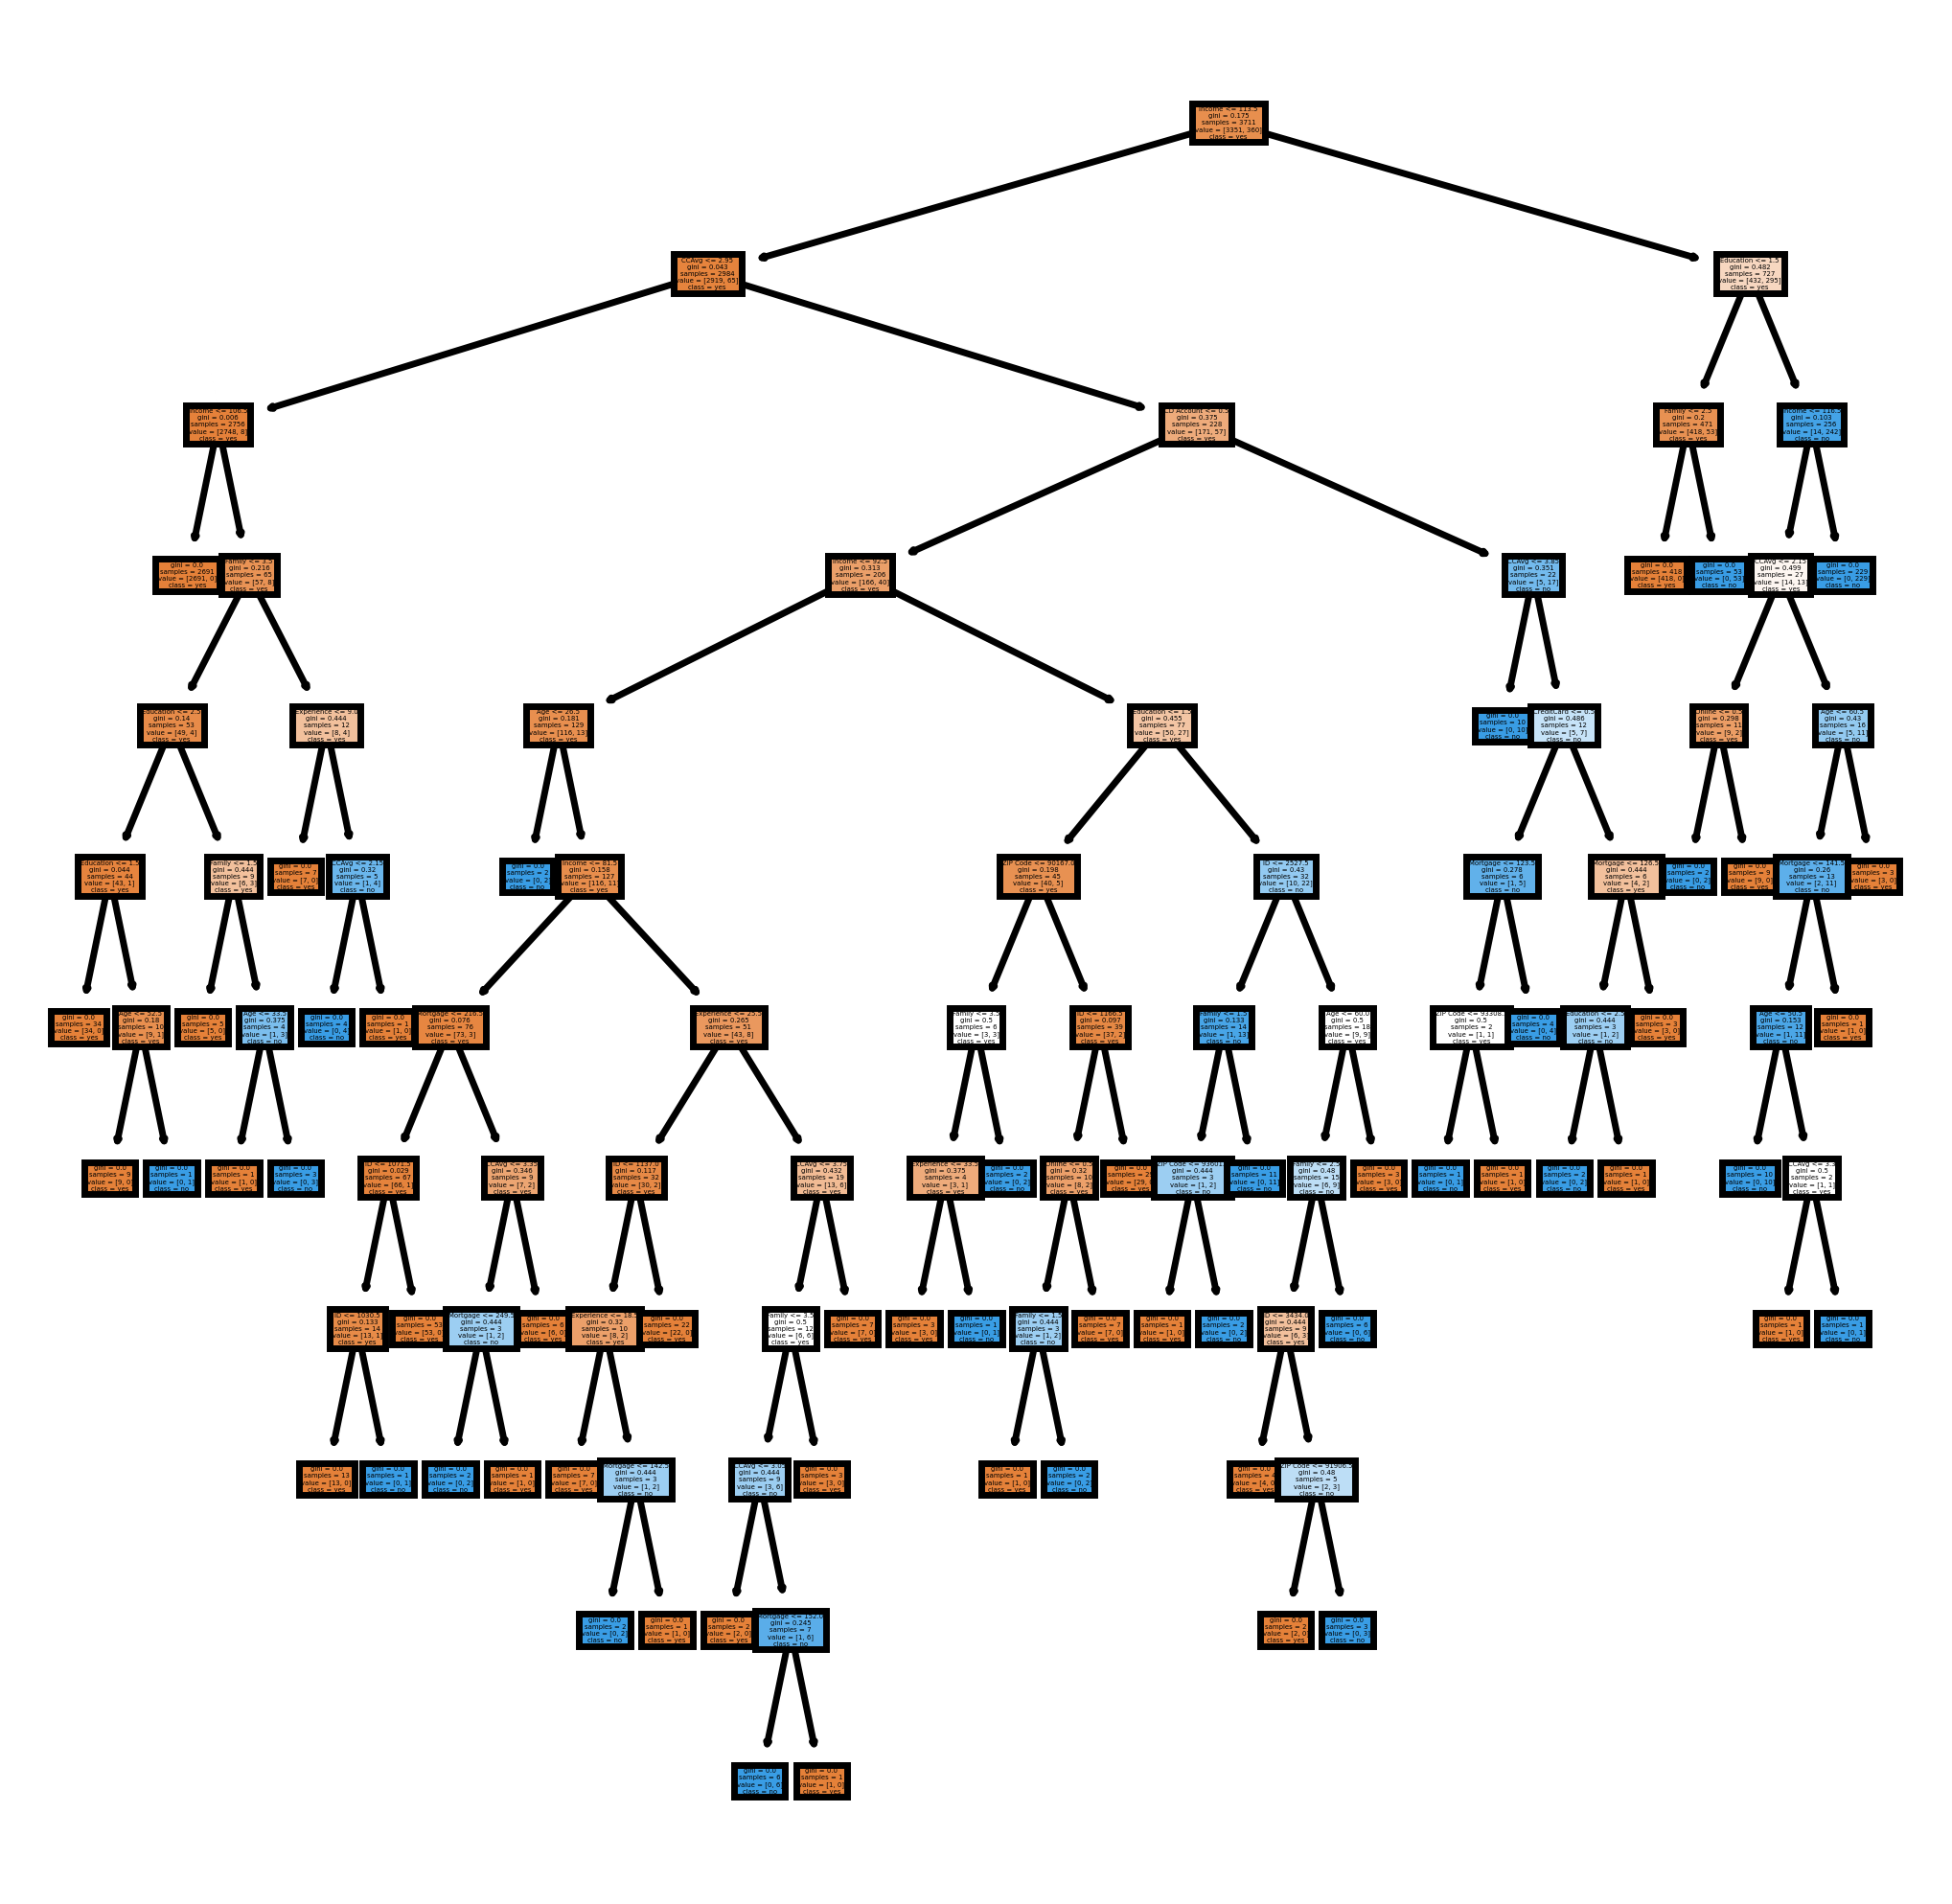

In [137]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']
# Setting dpi= 300 to make image clearer than default
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5), dpi=500)

dt_plot=plot_tree(dt,
                 feature_names=fn,
                 class_names=cn,
                 filled=True);

In [138]:
dt1=DecisionTreeClassifier(min_samples_split=150)
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 98.2%
Test Accuracy: 98.6%


In [140]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 100.0%
Test Accuracy: 98.0%


In [141]:
from sklearn.model_selection import GridSearchCV

params={
    'criterion':['gini','entropy'],
    'max_depth':[5,7,9],
    'min_samples_split':[10,15,20],
    'min_samples_leaf':[5,10,15]}
dtg=DecisionTreeClassifier()
    
gd_search=GridSearchCV(estimator=dtg,param_grid=params,cv=10,n_jobs=-1,verbose=2)

gd_search.fit(x_train,y_train)
    

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 15, 20]},
             verbose=2)

In [142]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [143]:
gd_search.best_score_

0.9865258093499115

In [144]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=10)

In [145]:
gd_search

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 15, 20]},
             verbose=2)

In [158]:
dt_f=DecisionTreeClassifier(criterion='entropy',max_depth=9,
                           min_samples_leaf=5,
                           min_samples_split=10)
dt_f.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=10)

In [159]:
print('Train Accuracy:',str(round(dt_f.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt_f.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 99.2%
Test Accuracy: 98.2%


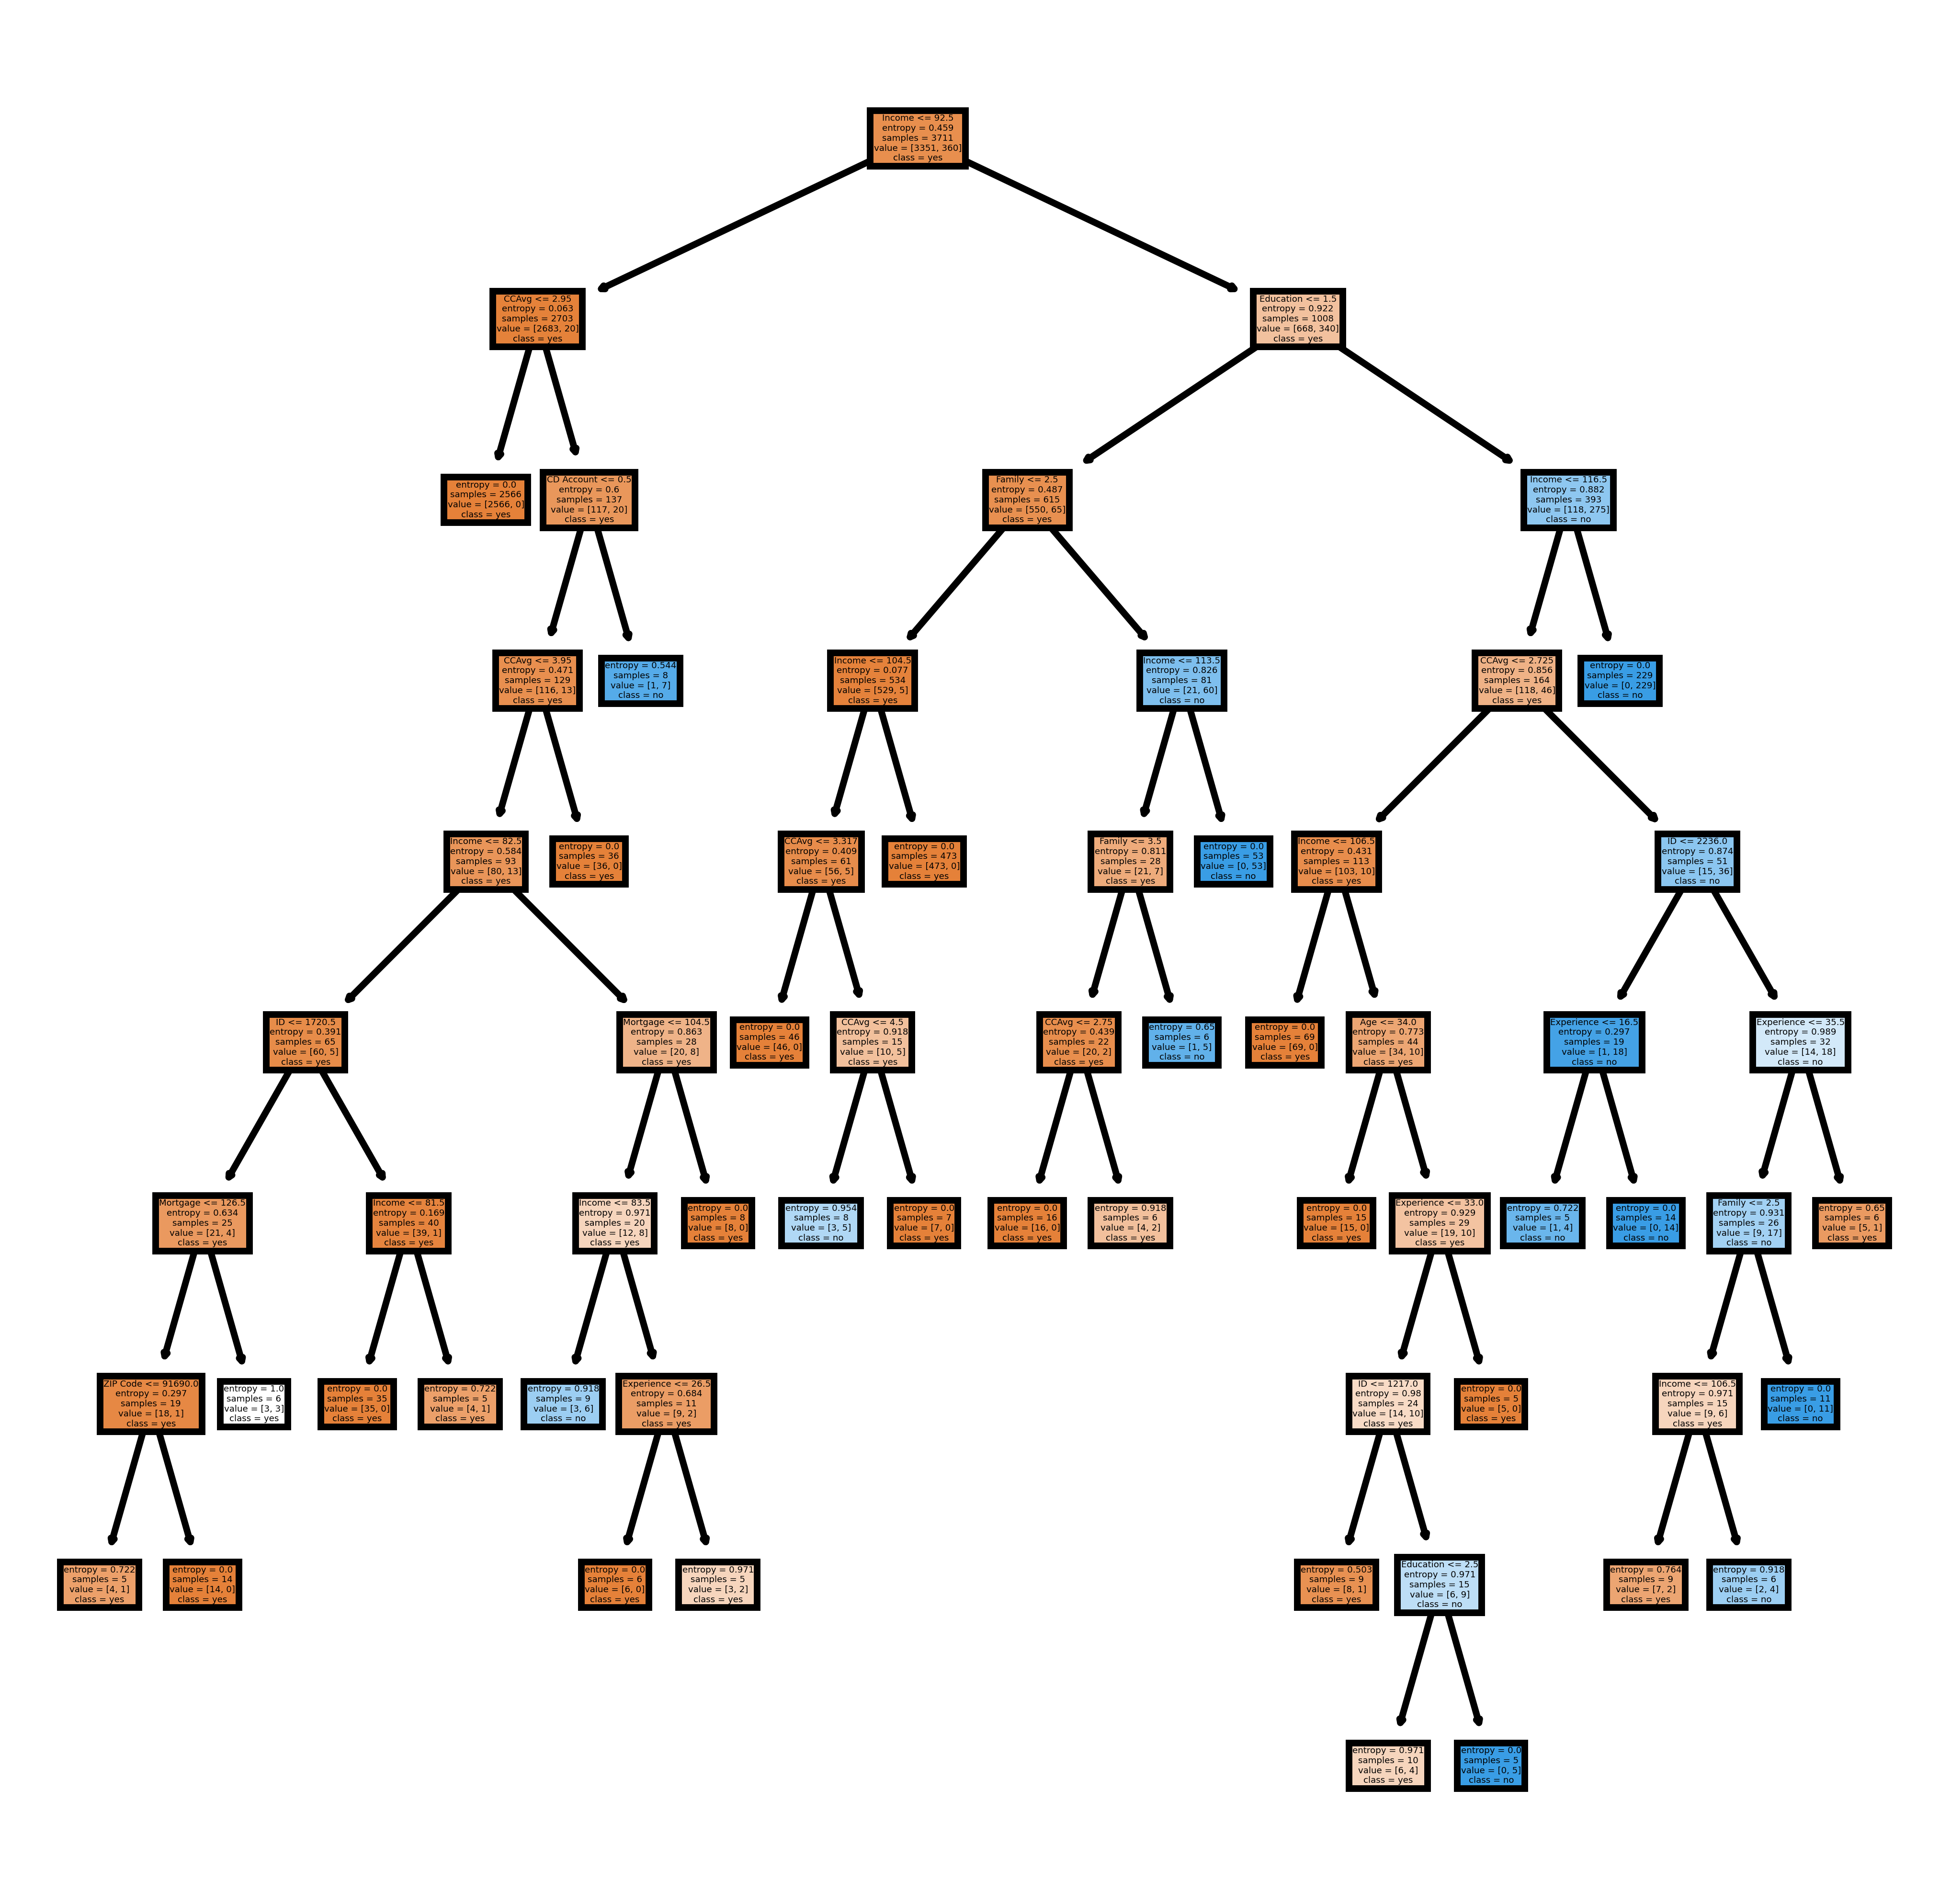

In [160]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']
# Setting dpi= 300 to make image clearer than default
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5), dpi=1000)

dt_plot=plot_tree(dt_f,
                 feature_names=fn,
                 class_names=cn,
                 filled=True);

### Feature Importance

In [161]:
dt_f.feature_importances_

array([0.0089535 , 0.00435607, 0.007202  , 0.55423223, 0.00125828,
       0.12962604, 0.10057586, 0.17780953, 0.00551662, 0.        ,
       0.01046987, 0.        , 0.        ])

In [162]:
feat_imp=pd.DataFrame({'Variable':x_train.columns,
             'Imp':dt_f.feature_importances_}).sort_values(by='Imp',ascending=False)
feat_imp

,Variable,Imp
3,Income,0.554232
7,Education,0.177810
5,Family,0.129626
6,CCAvg,0.100576
10,CD Account,0.010470
0,ID,0.008954
2,Experience,0.007202
8,Mortgage,0.005517
1,Age,0.004356
4,ZIP Code,0.001258


<AxesSubplot:xlabel='Variable', ylabel='Imp'>

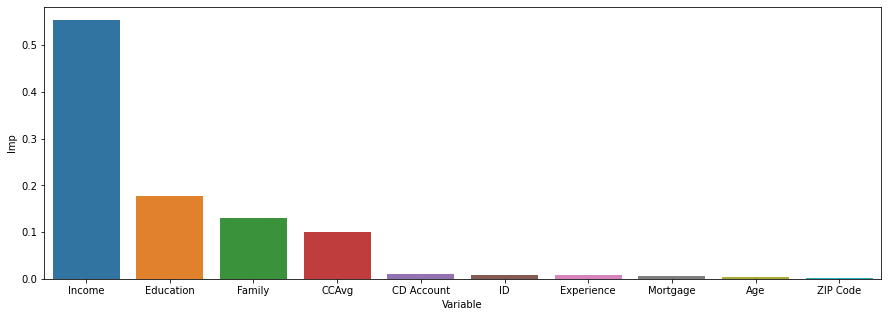

In [165]:
plt.figure(figsize=(15,5))
sns.barplot(data=feat_imp.head(10),x='Variable',y='Imp')

In [164]:
df2.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [166]:
x_train1=x_train[['Education','Income','Family','CCAvg','CD Account','Experience']]
x_test1=x_test[['Education','Income','Family','CCAvg','CD Account','Experience']]

In [167]:
dt_f=DecisionTreeClassifier(criterion='entropy',max_depth=5,
                           min_samples_leaf=10,
                           min_samples_split=10)
dt_f.fit(x_train1,y_train)
print('Train Accuracy:',str(round(dt_f.score(x_train1,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt_f.score(x_test1,y_test),3)*100)+str('%'))


Train Accuracy: 98.5%
Test Accuracy: 98.3%


In [168]:
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)    
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    auc1=metrics.roc_auc_score(act,pred)
    result={'Accuracy':ac1,'Recall':rc1,'Precision':pc1,'F1 score':f1,"AUC":auc1}
    
    fpr,tpr,threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

In [169]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)


In [170]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [171]:
metrics.accuracy_score(y_train,pred_train)
metrics.accuracy_score(y_test,pred_test)


0.9830234438156831

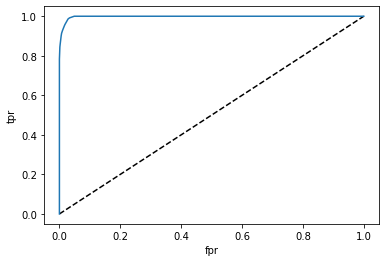

{'Accuracy': 0.9851791969819456,
 'Recall': 0.9,
 'Precision': 0.9446064139941691,
 'F1 score': 0.9217638691322902,
 'AUC': 0.9471650253655625}

In [172]:
classification_eva(y_train,pred_train,probs=prob_train_1)

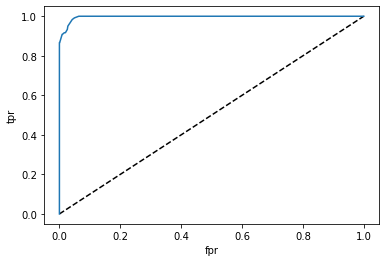

{'Accuracy': 0.9830234438156831,
 'Recall': 0.9083333333333333,
 'Precision': 0.9159663865546218,
 'F1 score': 0.9121338912133891,
 'AUC': 0.9496903909280812}

In [173]:
classification_eva(y_test,pred_test,probs=prob_test_1)

### Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
print('Train Accuracy:',rf.score(x_train,y_train))
print('Test Accuracy:',rf.score(x_test,y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9862570735650767


In [178]:
import time
tic=time.time()

In [1]:
# tic=time.time()
# params={'n_estimators':[100,150,200],
#        'criterion':['gini','entropy'],
#        'max_depth':[7,9,11,15],
#        'min_samples_split':[50,100,200],
#        'min_samples_leaf':[5,10,15,20],
#        'max_features':['sqrt','log2'],
#        'bootstrap':[True]
#        }
# # 3*2*4*3*4*2*1*10=5760
# rf1=RandomForestClassifier()
# gs_rf=GridSearchCV(estimator=rf1, param_grid=params, cv=10, n_jobs=-1, verbose=1)
# gs_rf.fit(x_train,y_train)
# toc=time.time()
# print("\n Total time taken",toc-tic)

## SVC

In [180]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn import svm

In [182]:
sv1=svm.LinearSVC()

In [183]:
help(sv1)

Help on LinearSVC in module sklearn.svm._classes object:

class LinearSVC(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : {'l1', 'l2'}, default='l2'
 |      Specifies 

In [261]:
df=pd.get_dummies(data=df,columns=['first_two_zip'])

In [262]:
y=df['Personal Loan']
x=df.drop(columns=['Personal Loan'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
# boosting,svm,knn,etc....x_trasform

In [264]:
mn=MinMaxScaler()
mnft=mn.fit(x_train)
x_train_norm=pd.DataFrame(mnft.transform(x_train),columns=x_train.columns)
# x_train_norm

In [265]:
x_test_norm=pd.DataFrame(mnft.transform(x_test),columns=x_test.columns)

In [266]:
sv1=svm.LinearSVC()
sv1.fit(x_train_norm,y_train)

LinearSVC()

In [267]:
print('Train Acc',sv1.score(x_train_norm,y_train))
print('Test Acc',sv1.score(x_test_norm,y_test))

Train Acc 0.9514285714285714
Test Acc 0.9546666666666667


### SVM-SVC

### kernel Tricks

In [271]:
sv2=svm.SVC() # by default kernal-'rbf'

In [ ]:
# by default degree is 2

In [272]:
sv2.fit(x_train_norm,y_train)

SVC()

In [273]:
# by default degree is 2 ie quadratic
sv2.fit(x_train_norm,y_train)
print('Train Acc',sv2.score(x_train_norm,y_train))
print('Test Acc',sv2.score(x_test_norm,y_test))

Train Acc 0.9714285714285714
Test Acc 0.97


In [274]:
sv2=svm.SVC(kernel='linear')
sv2.fit(x_train_norm,y_train)
print('Train Acc',sv2.score(x_train_norm,y_train))
print('Test Acc',sv2.score(x_test_norm,y_test))

Train Acc 0.9522857142857143
Test Acc 0.9546666666666667


In [275]:
sv2=svm.SVC(kernel='poly')
sv2.fit(x_train_norm,y_train)
print('Train Acc',sv2.score(x_train_norm,y_train))
print('Test Acc',sv2.score(x_test_norm,y_test))

Train Acc 0.9817142857142858
Test Acc 0.974


In [276]:
# help(sv2)

### Finding best parameters

In [277]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params={'kernel':['linear','poly','rbf'],
        'degree':[2,3,4],
        'gamma':[.1,1,.001],
        'C':[0.001,0.01,0.1,1,10,100]
}
sv=svm.SVC()
svm_rs=GridSearchCV(sv, params,cv=10,n_jobs=-1,verbose=True)
svm_rs.fit(x_train_norm,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 4], 'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [278]:
svm_rs.best_estimator_

SVC(C=100, degree=2, gamma=0.1)

In [279]:
svm_rs.best_params_

{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [280]:
svm_rs.best_score_

0.974

In [283]:
sv3=svm.SVC(kernel='poly',degree=2,C=100)

sv3.fit(x_train_norm,y_train)
print('Train Acc',sv3.score(x_train_norm,y_train))
print('Test Acc',sv3.score(x_test_norm,y_test))

Train Acc 0.9874285714285714
Test Acc 0.9766666666666667


In [2]:
# sv3.predict_proba(x_test_norm)

here probability cannot be find

In [285]:
sv3=svm.SVC(kernel='poly',degree=2,C=100,probability=True)

sv3.fit(x_train_norm,y_train)
print('Train Acc',sv3.score(x_train_norm,y_train))
print('Test Acc',sv3.score(x_test_norm,y_test))



Train Acc 0.9874285714285714
Test Acc 0.9766666666666667


In [293]:
sv3.predict_proba(x_train_norm)

array([[9.89150131e-01, 1.08498688e-02],
       [5.60508016e-01, 4.39491984e-01],
       [9.99851821e-01, 1.48178780e-04],
       ...,
       [9.99688769e-01, 3.11230660e-04],
       [9.97934038e-01, 2.06596180e-03],
       [9.99908875e-01, 9.11247137e-05]])

In [294]:
prob_train=pd.DataFrame(sv3.predict_proba(x_train_norm),columns=['prob_0','prob_1'])
prob_train

,prob_0,prob_1
0,0.989150,0.010850
1,0.560508,0.439492
2,0.999852,0.000148
3,0.939090,0.060910
4,0.998540,0.001460
...,...,...
3495,0.999030,0.000970
3496,0.850444,0.149556
3497,0.999689,0.000311
3498,0.997934,0.002066


In [295]:
new_pred_train=np.where(prob_train['prob_1']>.5,1,0)

In [296]:
print(metrics.classification_report(y_train,new_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3148
           1       1.00      0.86      0.93       352

    accuracy                           0.99      3500
   macro avg       0.99      0.93      0.96      3500
weighted avg       0.99      0.99      0.99      3500



In [286]:
sv3.predict_proba(x_test_norm)

array([[9.98961632e-01, 1.03836838e-03],
       [9.85848214e-01, 1.41517858e-02],
       [9.99391538e-01, 6.08461594e-04],
       ...,
       [9.88912184e-01, 1.10878165e-02],
       [9.86227267e-01, 1.37727329e-02],
       [9.94678257e-01, 5.32174301e-03]])

In [292]:
prob_test=pd.DataFrame(sv3.predict_proba(x_test_norm),columns=['prob_0','prob_1'])
prob_test

,prob_0,prob_1
0,0.998962,0.001038
1,0.985848,0.014152
2,0.999392,0.000608
3,0.998530,0.001470
4,0.877181,0.122819
...,...,...
1495,0.997328,0.002672
1496,0.989689,0.010311
1497,0.988912,0.011088
1498,0.986227,0.013773


In [290]:
new_pred_test=np.where(prob_test['prob_1']>.5,1,0)

In [291]:
print(metrics.classification_report(y_test,new_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.97      0.77      0.86       128

    accuracy                           0.98      1500
   macro avg       0.97      0.88      0.92      1500
weighted avg       0.98      0.98      0.98      1500



In [297]:
print(metrics.classification_report(y_train,new_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3148
           1       1.00      0.86      0.93       352

    accuracy                           0.99      3500
   macro avg       0.99      0.93      0.96      3500
weighted avg       0.99      0.99      0.99      3500

